In [ ]:
%pip install pandas numpy networkx matplotlib scikit-learn --quiet

In [31]:
import pandas as pd

df_posts = pd.read_csv("../../../post_data.csv")
df_replies = pd.read_csv("../../../replies_data.csv")

df = pd.merge(df_posts, df_replies, left_on='Post ID', right_on='Parent Post ID', how='inner', suffixes=('_post', '_reply'))
df.columns = [col.lower().replace(" ", "_") for col in df.columns]

df.head()


,post_id_post,user_id_post,thread_type_post,username_post,profile_picture_url_post,text_post_post,like_count_post,quote_count_post,caption_text_post,direct_reply_count_post,...,caption_text_reply,direct_reply_count_reply,repost_count_reply,following,followed_by,can_reply,reply_control,reshare_count,is_verified,parent_post_id
0,3481594135434044840,62926993725,thread,simolude_ai,https://scontent-fco2-1.cdninstagram.com/v/t51...,Aston Martin for you.\n\nFor more pics please ...,7,0,Aston Martin for you.\n\nFor more pics please ...,NaN,...,Aston Martin for you.\n\nFor more pics please ...,NaN,0.0,False,False,True,everyone,0,False,3481594135434044840
1,3481594135434044840,62926993725,thread,simolude_ai,https://scontent-fco2-1.cdninstagram.com/v/t51...,Aston Martin for you.\n\nFor more pics please ...,7,0,Aston Martin for you.\n\nFor more pics please ...,NaN,...,Aston Martin for you.\n\nFor more pics please ...,NaN,0.0,False,False,True,everyone,0,False,3481594135434044840
2,3481594135434044840,62926993725,thread,simolude_ai,https://scontent-fco2-1.cdninstagram.com/v/t51...,Aston Martin for you.\n\nFor more pics please ...,7,0,Aston Martin for you.\n\nFor more pics please ...,NaN,...,Aston Martin for you.\n\nFor more pics please ...,NaN,0.0,False,False,True,everyone,0,False,3481594135434044840
3,3481594135434044840,62926993725,thread,simolude_ai,https://scontent-fco2-1.cdninstagram.com/v/t51...,Aston Martin for you.\n\nFor more pics please ...,7,0,Aston Martin for you.\n\nFor more pics please ...,NaN,...,Aston Martin for you.\n\nFor more pics please ...,NaN,0.0,False,False,True,everyone,0,False,3481594135434044840
4,3481594135434044840,62926993725,thread,simolude_ai,https://scontent-fco2-1.cdninstagram.com/v/t51...,Aston Martin for you.\n\nFor more pics please ...,7,0,Aston Martin for you.\n\nFor more pics please ...,NaN,...,Aston Martin for you.\n\nFor more pics please ...,NaN,0.0,False,False,True,everyone,0,False,3481594135434044840


In [32]:
df.columns

Index(['post_id_post', 'user_id_post', 'thread_type_post', 'username_post',
       'profile_picture_url_post', 'text_post_post', 'like_count_post',
       'quote_count_post', 'caption_text_post', 'direct_reply_count_post',
       'repost_count_post', 'post_id_reply', 'user_id_reply',
       'thread_type_reply', 'username_reply', 'profile_picture_url_reply',
       'text_post_reply', 'like_count_reply', 'quote_count_reply',
       'caption_text_reply', 'direct_reply_count_reply', 'repost_count_reply',
       'following', 'followed_by', 'can_reply', 'reply_control',
       'reshare_count', 'is_verified', 'parent_post_id'],
      dtype='object')

In [35]:
import networkx as nx
# Creazione del grafo delle interazioni
G = nx.DiGraph()

# Aggiunta dei nodi e degli archi basati su risposte e repost
for _, row in df.iterrows():
    user_post = row['user_id_post']
    user_reply = row['user_id_reply']
    if user_reply and user_post:  # Se esiste un reply per il post
        G.add_edge(user_reply, user_post, weight=row['like_count_reply'])

# Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G, normalized=True, weight='weight')

# PageRank
pagerank = nx.pagerank(G, alpha=0.85)

# Katz Centrality
katz_centrality = nx.katz_centrality(G, alpha=0.1, beta=1.0, max_iter=1000, tol=1e-06)

# Bonacich Centrality (classic power centrality)
# NetworkX non implementa direttamente la Bonacich Centrality. Tuttavia, puoi utilizzare la centralità di potenza (power centrality)
# che è una generalizzazione di quella di Bonacich.
# Per implementare Bonacich centrality, dobbiamo definire la formula o usare librerie esterne, ma qui applichiamo power centrality.
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# HITS Algorithm
hits_hub, hits_authority = nx.hits(G, max_iter=1000, tol=1e-08)

# Mostra i top 10 utenti per ciascuna metrica
print("Top 10 utenti per Degree Centrality:")
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

print("\nTop 10 utenti per Closeness Centrality:")
print(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

print("\nTop 10 utenti per Betweenness Centrality:")
print(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

print("\nTop 10 utenti per PageRank:")
print(sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10])

print("\nTop 10 utenti per Eigenvector Centrality:")
print(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

print("\nTop 10 utenti per Katz Centrality:")
print(sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

#print("\nTop 10 utenti per Bonacich (Power) Centrality:")
#print(sorted(power_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

print("\nTop 10 utenti per HITS Hub Scores:")
print(sorted(hits_hub.items(), key=lambda x: x[1], reverse=True)[:10])

print("\nTop 10 utenti per HITS Authority Scores:")
print(sorted(hits_authority.items(), key=lambda x: x[1], reverse=True)[:10])



Top 10 utenti per Degree Centrality:
[(173545906, 0.01970954356846473), (2539769, 0.01867219917012448), (60573739849, 0.012448132780082988), (50094970840, 0.012448132780082988), (24280605, 0.01141078838174274), (6869786809, 0.01141078838174274), (60742845960, 0.010719225449515906), (3284967946, 0.010719225449515906), (58532451533, 0.009681881051175657), (387960, 0.009681881051175657)]

Top 10 utenti per Closeness Centrality:
[(173545906, 0.019017980636237896), (2539769, 0.017980636237897647), (60573739849, 0.011766174888581529), (50094970840, 0.011756569847856155), (24280605, 0.011397228324248096), (6869786809, 0.010719225449515906), (60742845960, 0.010027662517289074), (3284967946, 0.010027662517289074), (58532451533, 0.008990318118948824), (387960, 0.008990318118948824)]

Top 10 utenti per Betweenness Centrality:
[(232940351, 5.9803089953894216e-06), (52225947, 5.3822780958504795e-06), (58471482742, 4.903853376219326e-06), (324378, 2.750942137879134e-06), (534029757, 2.63133595797134

In [37]:
import random

# Aggiungiamo soglie casuali per ogni nodo nel grafo
for node in G.nodes():
    G.nodes[node]['threshold'] = random.uniform(0, 1)  # Soglia tra 0 e 1

# Funzione del modello a soglia lineare
def linear_threshold_model(G, seed_nodes):
    activated = set(seed_nodes)
    newly_activated = set(seed_nodes)

    # Inizializzazione dei pesi degli archi, distribuiti equamente per ogni nodo
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        if neighbors:
            # Distribuiamo l'influenza tra i vicini in modo uniforme
            weight = 1 / len(neighbors)
            for neighbor in neighbors:
                G.edges[node, neighbor]['influence'] = weight

    # Propagazione iterativa
    while newly_activated:
        next_activated = set()
        for node in G.nodes():
            if node not in activated:
                # Calcoliamo l'influenza totale dei vicini attivi
                total_influence = sum(G.edges[neighbor, node]['influence'] for neighbor in G.predecessors(node) if neighbor in activated)
                
                # Controlliamo se l'influenza totale supera la soglia del nodo
                if total_influence >= G.nodes[node]['threshold']:
                    next_activated.add(node)

        newly_activated = next_activated
        activated.update(newly_activated)

    return activated


top_influencers = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top Influencers by PageRank:", top_influencers)

# Simulazione con il modello LT
seed_nodes = [node for node, _ in top_influencers]  # I nodi iniziali influenti
activated_nodes_lt = linear_threshold_model(G, seed_nodes)

print("Numero totale di nodi attivati (LT Model):", len(activated_nodes_lt))


Top Influencers by PageRank: [(2539769, 0.018245340289791093), (173545906, 0.017590984185982258), (60573739849, 0.013823812432233996), (50094970840, 0.011865368277654928), (3688838069, 0.011714480263034413), (192592722, 0.011416666949328871), (60742845960, 0.011211012173846095), (3284967946, 0.010556656070037257), (1932667066, 0.010393067044085057), (54804347473, 0.010393067044085056)]
Numero totale di nodi attivati (LT Model): 10


In [38]:
# Modello di diffusione indipendente a cascata (IC)
def independent_cascade_model(G, seed_nodes, p=0.1):
    activated = set(seed_nodes)
    newly_activated = set(seed_nodes)

    while newly_activated:
        next_activated = set()
        for node in newly_activated:
            neighbors = set(G.neighbors(node)) - activated
            for neighbor in neighbors:
                if np.random.rand() < p:  # probabilità di attivazione
                    next_activated.add(neighbor)
        newly_activated = next_activated
        activated.update(newly_activated)

    return activated


# Selezione degli utenti più influenti
top_influencers = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top Influencers by PageRank:", top_influencers)

# Simulazione con il modello IC
seed_nodes = [node for node, _ in top_influencers]
activated_nodes = independent_cascade_model(G, seed_nodes)
print("Numero totale di nodi attivati:", len(activated_nodes))


Top Influencers by PageRank: [(2539769, 0.018245340289791093), (173545906, 0.017590984185982258), (60573739849, 0.013823812432233996), (50094970840, 0.011865368277654928), (3688838069, 0.011714480263034413), (192592722, 0.011416666949328871), (60742845960, 0.011211012173846095), (3284967946, 0.010556656070037257), (1932667066, 0.010393067044085057), (54804347473, 0.010393067044085056)]
Numero totale di nodi attivati: 10


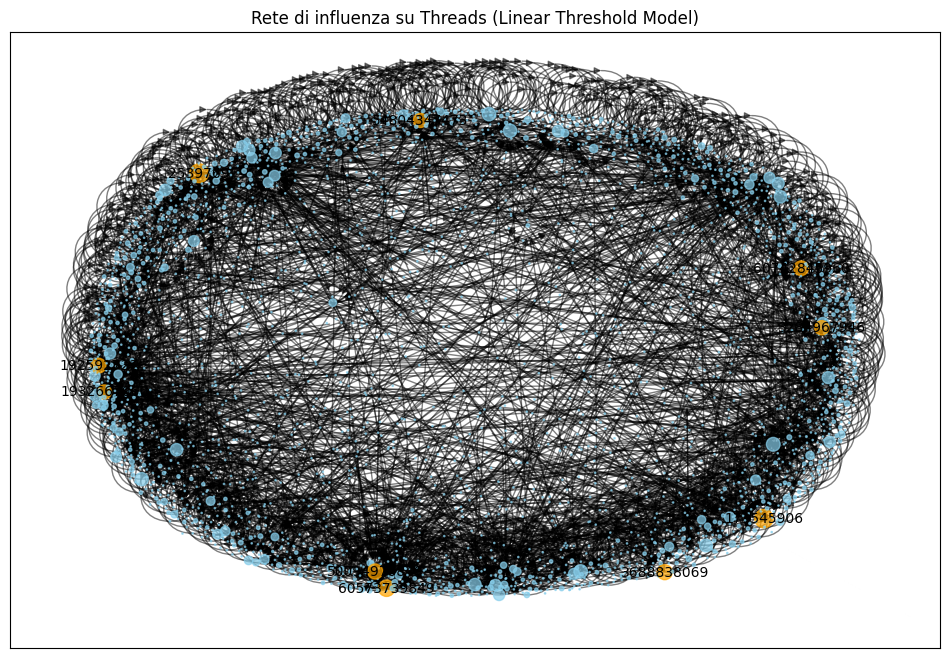

In [39]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15)
node_colors = ["orange" if node in activated_nodes_lt else "skyblue" for node in G.nodes()]
node_sizes = [pagerank[node] * 10000 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, {node: node for node, _ in top_influencers}, font_size=10)
plt.title("Rete di influenza su Threads (Linear Threshold Model)")
plt.show()

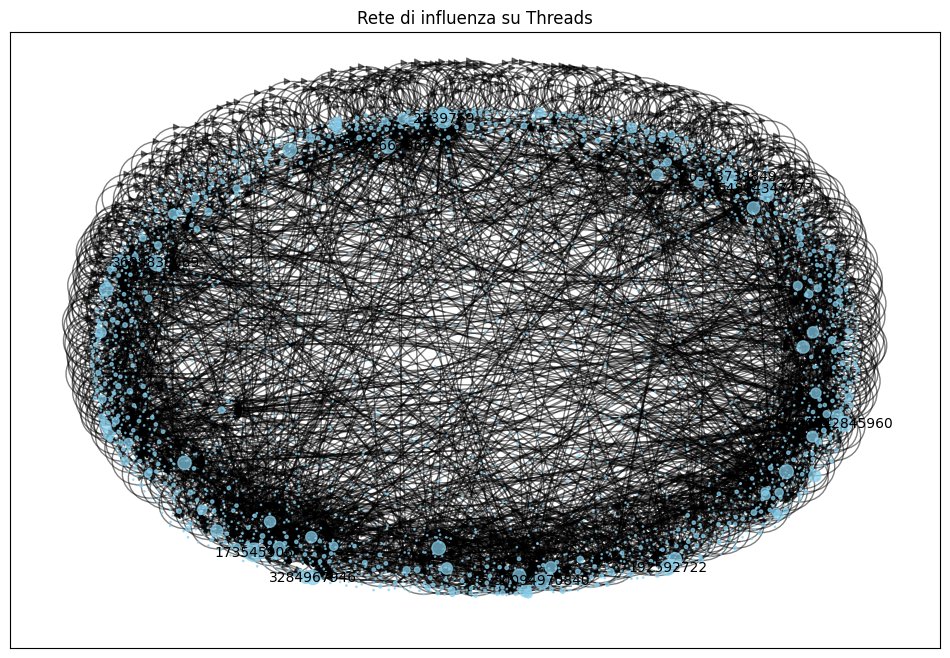

In [40]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15)
node_sizes = [pagerank[node] * 10000 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue", alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, {node: node for node, _ in top_influencers}, font_size=10)
plt.title("Rete di influenza su Threads")
plt.show()